# Unit #5 (b) Code

The goal of this notebook is to learn to analyze experimental data using ANOVA, ANCOVA, and other experimental design methods. 

## Problem #1

(Data source: https://online.stat.psu.edu/stat502/lesson/6/6.3)

The plants data consists of measurements of the heights of plants for four different fertilizer treatments ("0" = the standard treatment (control), and "1"-"3" are some potentially new treatment. The dataset also contains a factor variable called "block" which represent the different rows that the plants were arranged in. It is believed that in greenhouse within which the experiment is taking place, some micro-environmental variation is present, say, due to the glass wall on one end of the bench, and the open walkway at the other end.


#### (a) Load the data, save the treatment variable as a factor, and print a summary of the variables. Answer the following:

1. Does this study involve replication?
2. Is this a full factorial design?
3. Are there repeated measures?

In [16]:
library(tidyverse)
library(dplyr)
plants = read.table("https://www.colorado.edu/amath/sites/default/files/attached-files/plants-rcbd.txt", 
           sep = "\t", header = TRUE) #source of data: https://online.stat.psu.edu/stat502/lesson/1
plants$treatment = as.factor(plants$treatment)
summary(plants)
dim(plants)

       y         treatment     block    
 Min.   :19.50   0:6       Min.   :1.0  
 1st Qu.:22.50   1:6       1st Qu.:2.0  
 Median :27.25   2:6       Median :3.5  
 Mean   :26.17   3:6       Mean   :3.5  
 3rd Qu.:28.75             3rd Qu.:5.0  
 Max.   :32.00             Max.   :6.0  

[1] 24  3

This study does not have replication because of the blocking variable. It is a full factorial design and there are no repeated measures.

For now, let's ignore the block variable, and assume that all units are the same with respect to other variables that impact plant height (e.g., sunlight). Assume that the treatments were randomly assigned to plants, so that we have a completely randomized design (CRD).  

#### (b) Analyze this CRD experiment to answer two research questions:
1. Are there differences among the treatment groups?
2. Is there a difference between level 1 of the treatment and level 3 of the treatment?

#### Construct plots for an informal analysis, but also, conduct a formal analysis appropriate for a CRD.

In [50]:
library(gridExtra)
library(multcomp)
lmod = lm(data = plants, y~treatment)
summary(lmod)
anova(lmod)
contrast = glht(lmod, linfct = mcp(treatment = c(0,1,0,-1)))
summary(contrast)


Call:
lm(formula = y ~ treatment, data = plants)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.6000 -0.7750  0.0000  0.8833  3.4000 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  21.0000     0.7132  29.446  < 2e-16 ***
treatment1    7.6000     1.0086   7.535 2.90e-07 ***
treatment2    4.8667     1.0086   4.825 0.000103 ***
treatment3    8.2000     1.0086   8.130 9.07e-08 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.747 on 20 degrees of freedom
Multiple R-squared:  0.8047,	Adjusted R-squared:  0.7754 
F-statistic: 27.46 on 3 and 20 DF,  p-value: 2.712e-07


,Df,Sum Sq,Mean Sq,F value,Pr(>F)
treatment,3,251.44000,83.813333,27.46477,2.711994e-07
Residuals,20,61.03333,3.051667,NA,NA



	 Simultaneous Tests for General Linear Hypotheses

Multiple Comparisons of Means: User-defined Contrasts


Fit: lm(formula = y ~ treatment, data = plants)

Linear Hypotheses:
       Estimate Std. Error t value Pr(>|t|)
1 == 0   -0.600      1.009  -0.595    0.559
(Adjusted p values reported -- single-step method)


Warning message:
"`stat` is deprecated"`geom_smooth()` using method = 'loess' and formula 'y ~ x'
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
"pseudoinverse used at 20.959"Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
"neighborhood radius 7.641"Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
"reciprocal condition number  1.0146e-016"Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
"There are other near singularities as well. 11.386"`geom_smooth()` using method = 'loess' and formula 'y ~ x'
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
"pseudoinverse used at 20.959"Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
"neighborhood radius 7.641"Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
"reci

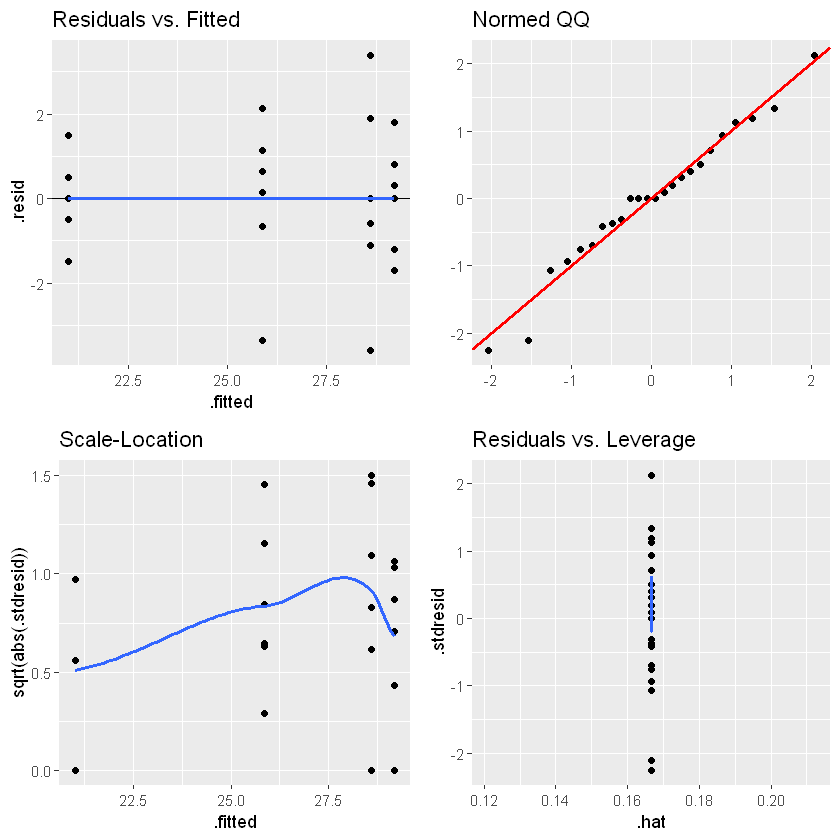

In [14]:
p1 <- qplot(data = lmod, x = .fitted, y = .resid) + geom_hline(yintercept = 0) + geom_smooth(se = FALSE) + ggtitle('Residuals vs. Fitted')
p2 <- qplot(data = lmod, sample =.stdresid, stat = "qq") + geom_abline(size = 1, color = 'red') + ggtitle('Normed QQ')
p3 <- qplot(data = lmod, x = .fitted, y = sqrt(abs(.stdresid))) + geom_smooth(se = FALSE) + ggtitle('Scale-Location')
p4 <- qplot(data = lmod, .hat, .stdresid) + geom_smooth(se = FALSE) + ggtitle('Residuals vs. Leverage')
grid.arrange(p1,p2,p3,p4)

The anova of the linear model with y as the response and treatment as a predictor variable has a p-value below 0.05 and we so we should reject the $H_0$: The model without the treatment parameter is sufficent. Thus there is a difference based on the treatment recieved. However looking at our diagonistic plots we see that several of the model assumptions are clearly violated, and we see our 4 treatments grouped in the fitted vs residual plot, and the scale-location plot so our CRD is an insufficent model, and we should attempt to block the nuisance variable. We cannot say at the 95% confidence level that there is a difference in treatment 1 and 3. Our tukey test shows that the 95% CI in the diffence between the means covers 0 so we will fail to reject $H_0: \mu_1 = \mu_3$

#### Show that the least squares estimates above are equivalent to conditional means, say, $\bar{y}_1, \bar{y}_2, \text{ and } \bar{y}_3$. 

In [60]:
cat(mean(plants$y, plants$treatment==0))

ERROR: Error in mean.default(plants$y, plants$treatment == 0): 'trim' must be numeric of length one


The full F-test has a small p-value, which suggests that there are some differences in mean plant height across the treatment groups. Our estimates of those differences are:

1. Difference between the control and treatment 1: 7.6
2. Difference between the control and treatment 2: $\approx 4.9$
3. Difference between the control and treatment 3: 8.2

How could you estimate the difference between treatment 1 and treatment 3? Further how could you test whether that difference is statistically significant? 

We can use a statistical tool called **contrasts**. 

**Definition**: Let $\theta_1,...,\theta_p$ be a set of parameters and $c_1,...,c_p$ be known constants. Then

\begin{align*}
\gamma = \sum^p_{i=1}c_i\theta_i
\end{align*}

is a constrast if 

\begin{align*}
\sum^p_{i=1}c_i = 0
\end{align*}

Contrasts can help us evaluate hypotheses about comparisons beyond the ones listed above (e.g., control against other treatments). 

For example, suppose that we want to test our second research hypothesis: whether the mean of plant height in treatment 1 ($\mu_1$) is different from the mean plant height for treatment 3 ($\mu_3$): 

$$H_0: \mu_1 = \mu_3 \,\,\, \text{ which is equivalent to } \,\, H_0: \mu_1 - \mu_3 = 0.$$ 

We can also think of this hypothesis as: 

$$H_0: \underbrace{(0)\mu_0 + (1)\mu_1 + (0)\mu_2 + (-1)\mu_3}_{\gamma} = 0.$$ 

The left hand side of the expression in $H_0$ is a contrast with $c_0 = c_2 = 0$ and $c_1 = -c_3 = 1$ and $\theta_i = \mu_i, \,\,\,\, i=0,...,3$.

The obvious estimator of $$\gamma = (0)\mu_0 + (1)\mu_1 + (0)\mu_2 + (-1)\mu_3$$ is $$\widehat\gamma = (0)\bar{Y}_0 + (1)\bar{Y}_1 + (0)\bar{Y}_2 + (-1)\bar{Y}_3,$$ just a substitution of sample means for population means. To conduct the hypothesis test, we need $E(\widehat\gamma)$ and $Var(\widehat\gamma)$:

$$E(\widehat\gamma) = E(\bar{Y}_1 -\bar{Y}_3) = E(\bar{Y}_1) - E(\bar{Y}_3) = \mu_1 - \mu_3 \overset{H_0}{=} 0$$

$$Var(\widehat\gamma) = Var(\bar{Y}_1 -\bar{Y}_3) = Var(\bar{Y}_1) + Var(\bar{Y}_3) = \sigma^2\bigg(\frac{1}{n_1} + \frac{1}{n_3} \bigg)$$

So, our test statistic is 

\begin{align*}
t = \frac{\widehat\gamma}{se(\widehat\gamma)} = \frac{\bar{Y}_1 -\bar{Y}_3}{\sigma\bigg(\frac{1}{n_1} + \frac{1}{n_3} \bigg)^{1/2}} = \frac{(\widehat\beta_0 + \widehat\beta_1) - (\widehat\beta_0 + \widehat\beta_3)}{\sigma\bigg(\frac{1}{n_1} + \frac{1}{n_3} \bigg)^{1/2}} = \frac{ \widehat\beta_1 -  \widehat\beta_3}{\sigma\bigg(\frac{1}{n_1} + \frac{1}{n_3} \bigg)^{1/2}} \sim t(n-4).
\end{align*}


#### Test these hypotheses using the CRD plant data.

In [28]:
cat('The t-stat for gamma of treatment 1 - treatment 3 ', (coef(lmod)[2]-coef(lmod)[4])/(sd(plants$y)*sqrt(1/3)), '\n')
cat('The t-stat for gamma of Control - treatment 1 ', (coef(lmod)[1]-coef(lmod)[2])/(sd(plants$y)*sqrt(1/3)), '\n')
cat('The t-stat for gamma of Control - treatment 2 ', (coef(lmod)[1]-coef(lmod)[3])/(sd(plants$y)*sqrt(1/3)), '\n')
cat('The t-stat for gamma of Control - treatment 3 ', (coef(lmod)[1]-coef(lmod)[4])/(sd(plants$y)*sqrt(1/3)), '\n')
cat('The t-stat for 95% 2 sided CI ',qt(0.975,20))

The t-stat for gamma of treatment 1 - treatment 3  -0.2819482 
The t-stat for gamma of Control - treatment 1  6.296843 
The t-stat for gamma of Control - treatment 2  7.581274 
The t-stat for gamma of Control - treatment 3  6.014895 
The t-stat for 95% 2 sided CI  2.085963

From above we can see that if the t-stat is between (-2.085963, 2.085963) then we cannot reject the NULL: $\mu_i = \mu_j$ the only case that this occurs for is the difference between treatment 1 and 3. For the difference between the control and all 3 of the treatments we can say at a 95% confidence level that there is a difference in the means

#### (c) How can we relate the effects found above to *causal* effects? Consider the three important conditions for establishing causality from our [introduction to experimental design](https://youtu.be/93XExMDheRk) in your answer. 

Our three conditions are, emperical association, correct temporial relationship, and nonspuriousness. The first two conditions are met, there is are theoretical considerations that tell us that fertilizer effects plant growth by changing soil chemistry, and the temporial relationship is correct, the treatment comes before the plant growth measurements. However the nonspuriousness condition is violated. There is clearly a confounding variable which is why a CRBD would be a superior option

## Problem #2

In this problem, let's continue with the plants data, but reintroduce the blocking variable. Recall that the blocks represent the different rows that the plants were arranged in. It is believed that in greenhouse within which the experiment is taking place, some micro-environmental variation is present, say, due to the glass wall on one end of the bench, and the open walkway at the other end. Since this is a known nuisance variable, we should take it into account. 

#### Analyze the data as a randomized complete block design. Perform tests to answer the research questions from problem #1:

1. Are there differences among the treatment groups?
2. Is there a difference between level 1 of the treatment and level 3 of the treatment?


In [51]:
lmod2 = lm(data = plants, y ~ factor(block) + treatment)
summary(lmod2)
anova(lmod2)
contrast = glht(lmod2, linfct = mcp(treatment = c(0,1,0,-1)))
summary(contrast)


Call:
lm(formula = y ~ factor(block) + treatment, data = plants)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.0583 -0.3521 -0.0125  0.2792  1.1917 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)     18.4583     0.4392  42.030  < 2e-16 ***
factor(block)2   1.6750     0.5071   3.303 0.004829 ** 
factor(block)3   2.4250     0.5071   4.782 0.000242 ***
factor(block)4   2.7750     0.5071   5.472 6.43e-05 ***
factor(block)5   3.6250     0.5071   7.148 3.35e-06 ***
factor(block)6   4.7500     0.5071   9.367 1.17e-07 ***
treatment1       7.6000     0.4141  18.355 1.09e-11 ***
treatment2       4.8667     0.4141  11.754 5.74e-09 ***
treatment3       8.2000     0.4141  19.804 3.64e-12 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.7172 on 15 degrees of freedom
Multiple R-squared:  0.9753,	Adjusted R-squared:  0.9621 
F-statistic: 74.07 on 8 and 15 DF,  p-value: 1.163e-10


,Df,Sum Sq,Mean Sq,F value,Pr(>F)
factor(block),5,53.31833,10.6636667,20.73299,2.986726e-06
treatment,3,251.44000,83.8133333,162.95528,1.143729e-11
Residuals,15,7.71500,0.5143333,NA,NA



	 Simultaneous Tests for General Linear Hypotheses

Multiple Comparisons of Means: User-defined Contrasts


Fit: lm(formula = y ~ factor(block) + treatment, data = plants)

Linear Hypotheses:
       Estimate Std. Error t value Pr(>|t|)
1 == 0  -0.6000     0.4141  -1.449    0.168
(Adjusted p values reported -- single-step method)


We can see that the p-value has decreased for the treatment 1 vs. 3 but remains well above 0.05 therefor we will not reject the $H_0: \mu_1 = \mu_3$

Warning message:
"`stat` is deprecated"`geom_smooth()` using method = 'loess' and formula 'y ~ x'
`geom_smooth()` using method = 'loess' and formula 'y ~ x'
`geom_smooth()` using method = 'loess' and formula 'y ~ x'
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
"pseudoinverse used at 0.375"Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
"neighborhood radius 1.1102e-016"Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
"reciprocal condition number  5.4914e-017"

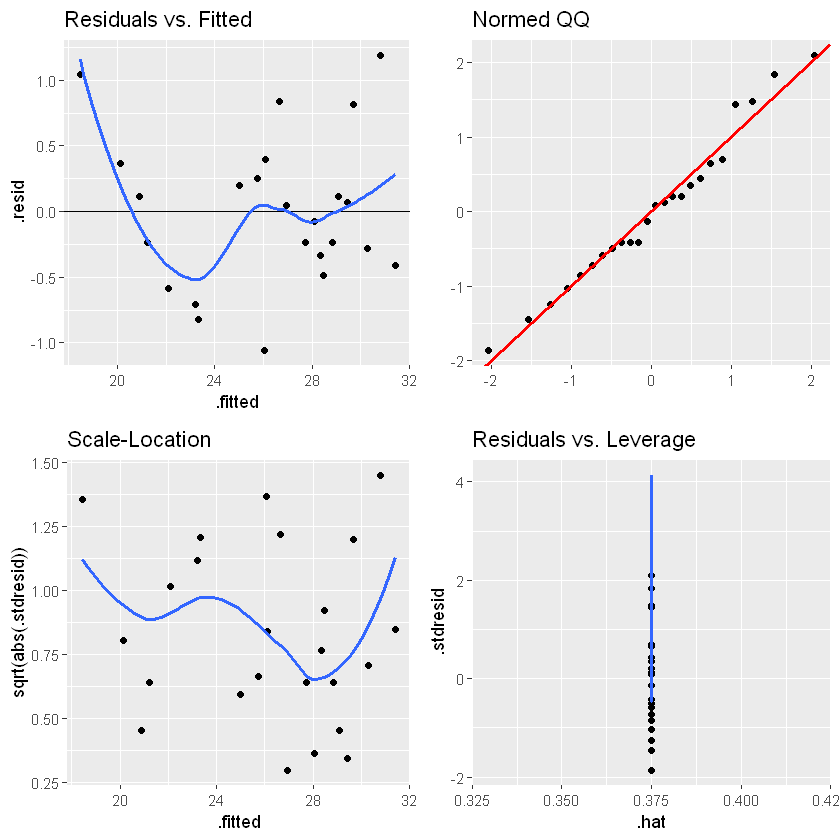

In [31]:
p1 <- qplot(data = lmod2, x = .fitted, y = .resid) + geom_hline(yintercept = 0) + geom_smooth(se = FALSE) + ggtitle('Residuals vs. Fitted')
p2 <- qplot(data = lmod2, sample =.stdresid, stat = "qq") + geom_abline(size = 1, color = 'red') + ggtitle('Normed QQ')
p3 <- qplot(data = lmod2, x = .fitted, y = sqrt(abs(.stdresid))) + geom_smooth(se = FALSE) + ggtitle('Scale-Location')
p4 <- qplot(data = lmod2, .hat, .stdresid) + geom_smooth(se = FALSE) + ggtitle('Residuals vs. Leverage')
grid.arrange(p1,p2,p3,p4)

## Problem #3

Consider a hardness testing machine that presses a rod with a pointed tip into a metal specimen with a known force. By measuring the depth of the depression caused by the tip, the hardness of the specimen is determined.

Suppose we wish to determine whether or not four different tips produce different readings on a hardness testing machine. The experimenter has decided to obtain four observations on Rockwell C-scale hardness for each tip. There is only one factor - tip type - and a completely randomized single-factor design would consist of randomly assigning each one of the $4 \times 4 = 16$ runs to an experimental unit, that is, a metal coupon, and observing the hardness reading that results. Thus, 16 different metal test coupons would be required in this experiment, one for each run in the design. 

There is a potentially serious problem with a completely randomized experiment in this design situation. If the metal coupons differ slightly in their hardness, as might happen if they are taken from ingots that are produced in different heats, the experimental units (the coupons) will contribute to the variability observed in the hardness data. As a result, the experimental error will reflect both random error and variability between coupons. We would like to make the experimental error as small as possible; that is, we would like to remove the variability between coupons from the experimental error. A design that would accomplish this requires the experimenter to test each tip once on each of four coupons.”

In [34]:
tip    = factor(rep(1:4, each = 4))
coupon = factor(rep(1:4, times = 4))
y = c(9.3, 9.4, 9.6, 10,
       9.4, 9.3, 9.8, 9.9,
       9.2, 9.4, 9.5, 9.7,
       9.7, 9.6, 10, 10.2)
hardness = data.frame(y, tip, coupon)
hardness


y,tip,coupon
9.3,1,1
9.4,1,2
9.6,1,3
10.0,1,4
9.4,2,1
9.3,2,2
9.8,2,3
9.9,2,4
9.2,3,1
9.4,3,2


#### (a) Construct interaction plots for tip and coupon.

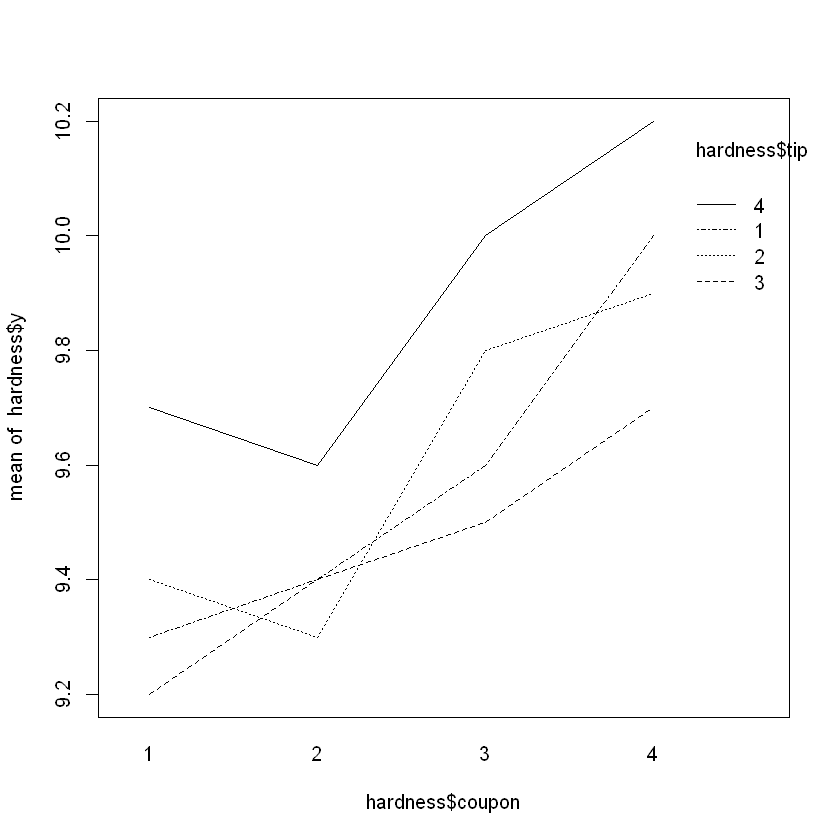

In [38]:
interaction.plot(hardness$coupon, hardness$tip, hardness$y)

Notice above that there is no *replication* within blocks here: for example, tip 1 is tested on coupon 1 only once. So, with 16 total data points, we won't have enough data to conduct any tests of we include interaction terms.

#### Show this by running a two-way ANOVA with an interaction term. What do you notice?

In [39]:
anova(lm(data = hardness, y ~ tip + coupon + tip:coupon))

Warning message in anova.lm(lm(data = hardness, y ~ tip + coupon + tip:coupon)):
"ANOVA F-tests on an essentially perfect fit are unreliable"

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
tip,3,0.385,0.128333333,NaN,NaN
coupon,3,0.825,0.275000000,NaN,NaN
tip:coupon,9,0.080,0.008888889,NaN,NaN
Residuals,0,0.000,NaN,NA,NA


We get a nice warning from R about how ANOVA on a perfect fit is unreliable, which makes sense because there is no replication so the model we construct can fit exactly to the data, which implies the error term is 0 which is unlikely

#### (b) Check for a treatment effect, without interaction terms (CRBD). The lm() and anova() functions will give us some important results. Interpret!

In [55]:
lmod3 = lm(data = hardness, y ~ tip + coupon)
anova(lmod3)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
tip,3,0.385,0.128333333,14.4375,0.0008712721
coupon,3,0.825,0.275000000,30.9375,0.0000452327
Residuals,9,0.080,0.008888889,NA,NA


We can see that the P-value for the tip factor is below 0.05 and so we conclude that that we reject $H_0:$ the reduced model is sufficient. So we will use the complete model because there is a difference in hardness based on which tip was used

#### (c) Compare the estimate of the error variance for the RCBD against a CRD. Have we reduced that variance by using blocking?

In [52]:
aov(lm(data = hardness, y ~ tip))
aov(lmod3)

Call:
   aov(formula = lm(data = hardness, y ~ tip))

Terms:
                  tip Residuals
Sum of Squares  0.385     0.905
Deg. of Freedom     3        12

Residual standard error: 0.274621
Estimated effects may be unbalanced

Call:
   aov(formula = lmod3)

Terms:
                  tip coupon Residuals
Sum of Squares  0.385  0.825     0.080
Deg. of Freedom     3      3         9

Residual standard error: 0.0942809
Estimated effects may be unbalanced

Using our analysis of variance we see that the residual standard error is substainally reduced by adding the blocking factor in

#### (d) 

Let's take a look at the use of contrasts. Recall that a contrast takes the form 

$$\sum_{i=1}^t c_i\mu_i = 0,$$

where $\mathbf{c} = (c_1,...,c_t)$ is a constant vector and $\mathbf{\mu} = (\mu_1,...,\mu_t)$ is a parameter vector (e.g., $\mu_1$ is the mean of the $i^{th}$ group). 

We can note that $\mathbf{c} = (-1,1,0,0)$ corresponds to the null hypothesis $H_0: \mu_2 - \mu_1 = 0$, where $\mu_1$ is the mean associated with tip1 and $\mu_2$ is the mean associated with tip2.  

#### Write code below tests this hypothesis. What should we conclude?

In [56]:
contrast = glht(lmod3, linfct = mcp(tip = c(-1,1,0,0)))
summary(contrast)


	 Simultaneous Tests for General Linear Hypotheses

Multiple Comparisons of Means: User-defined Contrasts


Fit: lm(formula = y ~ tip + coupon, data = hardness)

Linear Hypotheses:
       Estimate Std. Error t value Pr(>|t|)
1 == 0  0.02500    0.06667   0.375    0.716
(Adjusted p values reported -- single-step method)


We see that our p-value is above 0.05 so we cannot conclude there is a difference in the means of tip 1 and tip 2

Notice that this test has already been done for us in the t-test for tip2 above. So, a nontrivial use of contrasts is to test the difference between means, where neither are the control in the model. 

#### (e) For example, test $H_0: \mu_4 - \mu_3 = 0$.

In [57]:
contrast = glht(lmod3, linfct = mcp(tip = c(0,0,-1,1)))
summary(contrast)


	 Simultaneous Tests for General Linear Hypotheses

Multiple Comparisons of Means: User-defined Contrasts


Fit: lm(formula = y ~ tip + coupon, data = hardness)

Linear Hypotheses:
       Estimate Std. Error t value Pr(>|t|)    
1 == 0  0.42500    0.06667   6.375 0.000129 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1
(Adjusted p values reported -- single-step method)


We can see that the p-value is below 0.05 so we can conclude at the 95% confidence level that there is difference in the means from tip 3 to tip 4

Further, we might test all possible pairwise comparisons between treatments. This can be done by setting the treatment factor (tip) to "Tukey". Notice that the p-values are adjusted (because we are conducting multiple hypotheses!).

In [58]:
fit.gh = glht(lmod3, linfct = mcp(tip = c(0,-1,1,0)))
summary(fit.gh)

fit.gh = glht(lmod3, linfct = mcp(tip = "Tukey"))
summary(fit.gh)


	 Simultaneous Tests for General Linear Hypotheses

Multiple Comparisons of Means: User-defined Contrasts


Fit: lm(formula = y ~ tip + coupon, data = hardness)

Linear Hypotheses:
       Estimate Std. Error t value Pr(>|t|)  
1 == 0 -0.15000    0.06667   -2.25    0.051 .
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1
(Adjusted p values reported -- single-step method)



	 Simultaneous Tests for General Linear Hypotheses

Multiple Comparisons of Means: Tukey Contrasts


Fit: lm(formula = y ~ tip + coupon, data = hardness)

Linear Hypotheses:
           Estimate Std. Error t value Pr(>|t|)    
2 - 1 == 0  0.02500    0.06667   0.375  0.98088    
3 - 1 == 0 -0.12500    0.06667  -1.875  0.30254    
4 - 1 == 0  0.30000    0.06667   4.500  0.00664 ** 
3 - 2 == 0 -0.15000    0.06667  -2.250  0.18126    
4 - 2 == 0  0.27500    0.06667   4.125  0.01154 *  
4 - 3 == 0  0.42500    0.06667   6.375  < 0.001 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1
(Adjusted p values reported -- single-step method)
